In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel('AirlineData.xlsx')
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [4]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [5]:
df['Route'].mode()

0    DEL → BOM → COK
Name: Route, dtype: object

In [6]:
df['Route'] = df['Route'].fillna(df['Route'].mode()[0])

In [7]:
df['Total_Stops'].mode()

0    1 stop
Name: Total_Stops, dtype: object

In [8]:
df['Total_Stops'] = df['Total_Stops'].fillna(df['Total_Stops'].mode()[0])

In [9]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [10]:
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10683 non-null  object        
 1   Date_of_Journey  10683 non-null  datetime64[ns]
 2   Source           10683 non-null  object        
 3   Destination      10683 non-null  object        
 4   Route            10683 non-null  object        
 5   Dep_Time         10683 non-null  object        
 6   Arrival_Time     10683 non-null  object        
 7   Duration         10683 non-null  object        
 8   Total_Stops      10683 non-null  object        
 9   Additional_Info  10683 non-null  object        
 10  Price            10683 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 918.2+ KB


In [12]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [13]:
df.replace({'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}, inplace=True)

In [14]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302


In [15]:
df['Total_Stops'].value_counts()

1    5626
0    3491
2    1520
3      45
4       1
Name: Total_Stops, dtype: int64

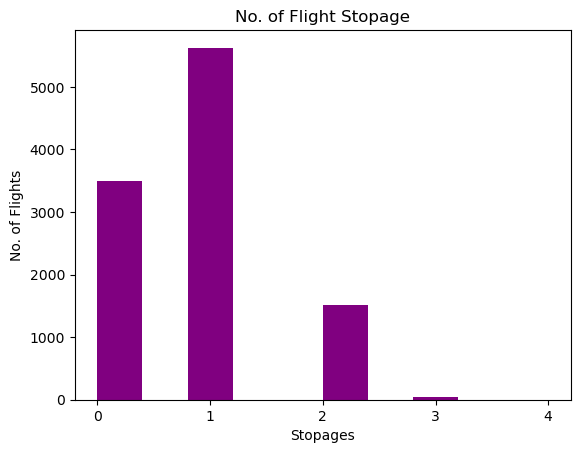

In [16]:
# from this histogram we can see the number of flights and their stopages

plt.title("No. of Flight Stopage")
plt.hist(df['Total_Stops'],color='purple')
plt.xlabel("Stopages")
plt.ylabel("No. of Flights")
plt.xticks(df['Total_Stops'].unique())
plt.show()

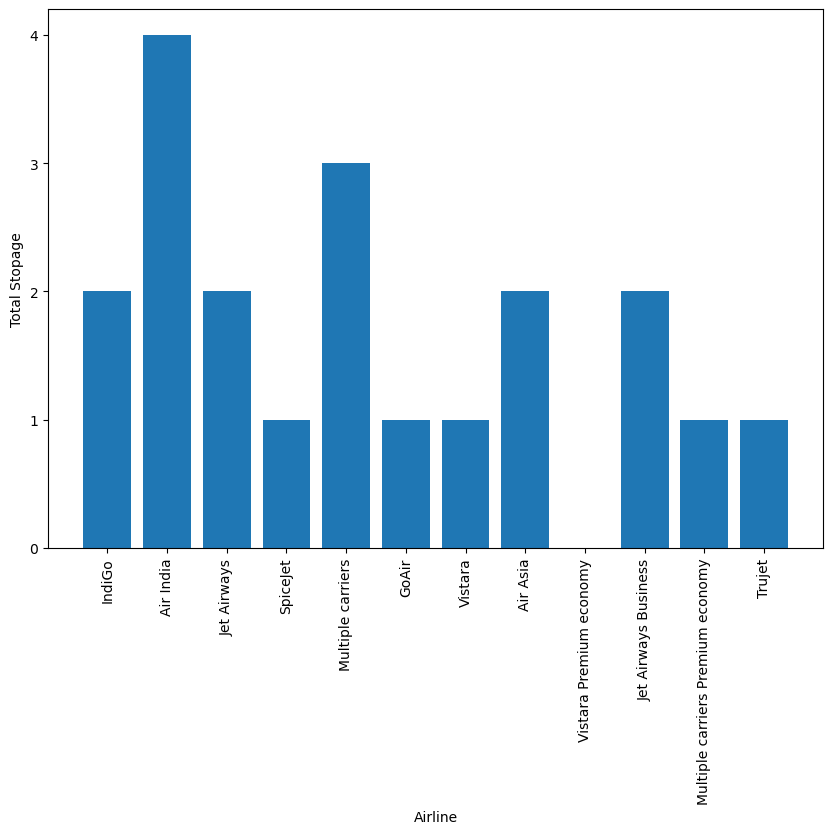

In [17]:
plt.figure(figsize=(10,7))
plt.bar(df['Airline'],df['Total_Stops'])
plt.xlabel('Airline')
plt.ylabel('Total Stopage')
plt.xticks(rotation= 90)
plt.yticks(df['Total_Stops'].unique())
plt.show()

In [18]:
df[df['Total_Stops']==4]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9182,Air India,2019-01-03,Banglore,New Delhi,BLR → CCU → BBI → HYD → VGA → DEL,05:50,11:20 02 Mar,29h 30m,4,Change airports,17686


In [19]:
# What flight is expensive and what flight is cheeper 

# max is finding the most expensive flight
# sum is finding which flight is generating maximum profit


p = df.groupby('Airline')['Price'].agg(['sum','max']).reset_index().sort_values(by='max', ascending = False)
p

,Airline,sum,max
5,Jet Airways Business,350152,79512
4,Jet Airways,44817461,54826
6,Multiple carriers,13039603,36983
1,Air India,16838841,31945
8,SpiceJet,3548717,23267
2,GoAir,1137045,22794
3,IndiGo,11648071,22153
10,Vistara,3734451,21730
7,Multiple carriers Premium economy,148445,14629
0,Air Asia,1783293,13774


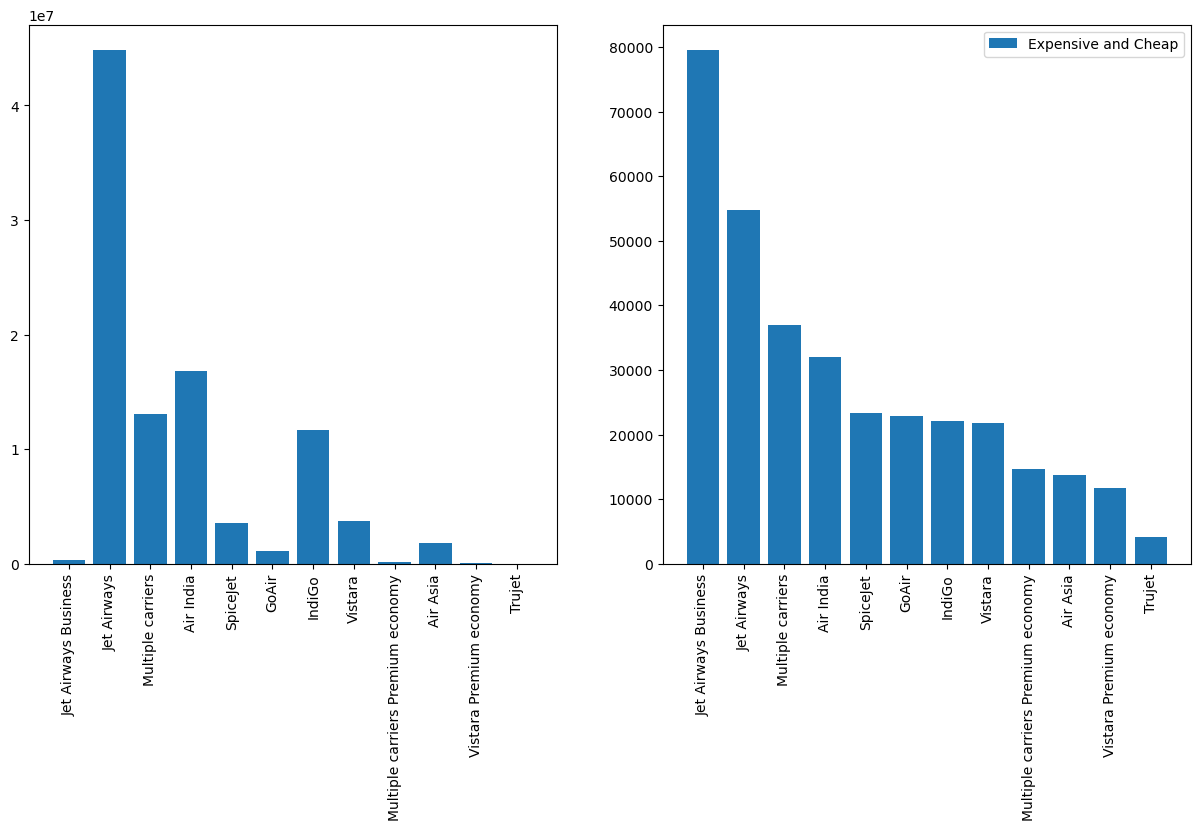

In [20]:
plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
plt.bar(p['Airline'],p['sum'], label="Overall Profit")
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.bar(p['Airline'],p['max'], label="Expensive and Cheap")
plt.xticks(rotation=90)

plt.legend()
plt.show()

In [21]:
# Variation of Flight price from source

df['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [22]:
df.replace({'New Delhi':'Delhi'}, inplace=True)

In [23]:
df['Date_of_Journey'].unique()

array(['2019-03-24T00:00:00.000000000', '2019-01-05T00:00:00.000000000',
       '2019-09-06T00:00:00.000000000', '2019-12-05T00:00:00.000000000',
       '2019-01-03T00:00:00.000000000', '2019-06-24T00:00:00.000000000',
       '2019-12-03T00:00:00.000000000', '2019-05-27T00:00:00.000000000',
       '2019-01-06T00:00:00.000000000', '2019-04-18T00:00:00.000000000',
       '2019-09-05T00:00:00.000000000', '2019-04-24T00:00:00.000000000',
       '2019-03-03T00:00:00.000000000', '2019-04-15T00:00:00.000000000',
       '2019-12-06T00:00:00.000000000', '2019-06-03T00:00:00.000000000',
       '2019-03-21T00:00:00.000000000', '2019-03-04T00:00:00.000000000',
       '2019-06-05T00:00:00.000000000', '2019-05-15T00:00:00.000000000',
       '2019-06-18T00:00:00.000000000', '2019-06-15T00:00:00.000000000',
       '2019-06-04T00:00:00.000000000', '2019-05-18T00:00:00.000000000',
       '2019-06-27T00:00:00.000000000', '2019-05-21T00:00:00.000000000',
       '2019-03-06T00:00:00.000000000', '2019-03-15

In [24]:
df['Day_of_journey'] = df['Date_of_Journey'].dt.day
df['Month_of_journey'] = df['Date_of_Journey'].dt.month

In [25]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_journey,Month_of_journey
0,IndiGo,2019-03-24,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882,6,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218,5,12
4,IndiGo,2019-01-03,Banglore,Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,0,No info,4107,4,9
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,0,No info,4145,27,4
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,0,No info,7229,27,4
10681,Vistara,2019-01-03,Banglore,Delhi,BLR → DEL,11:30,14:10,2h 40m,0,No info,12648,3,1


In [26]:
# Since we have converted date of journey into integer we can drop it
df.drop(columns=['Date_of_Journey'],inplace=True)

In [27]:
x = list(df['Day_of_journey'].unique())
x

[24, 5, 6, 3, 27, 18, 15, 21, 4]

In [28]:
y = list(df['Month_of_journey'].unique())
y

[3, 1, 9, 12, 6, 5, 4]

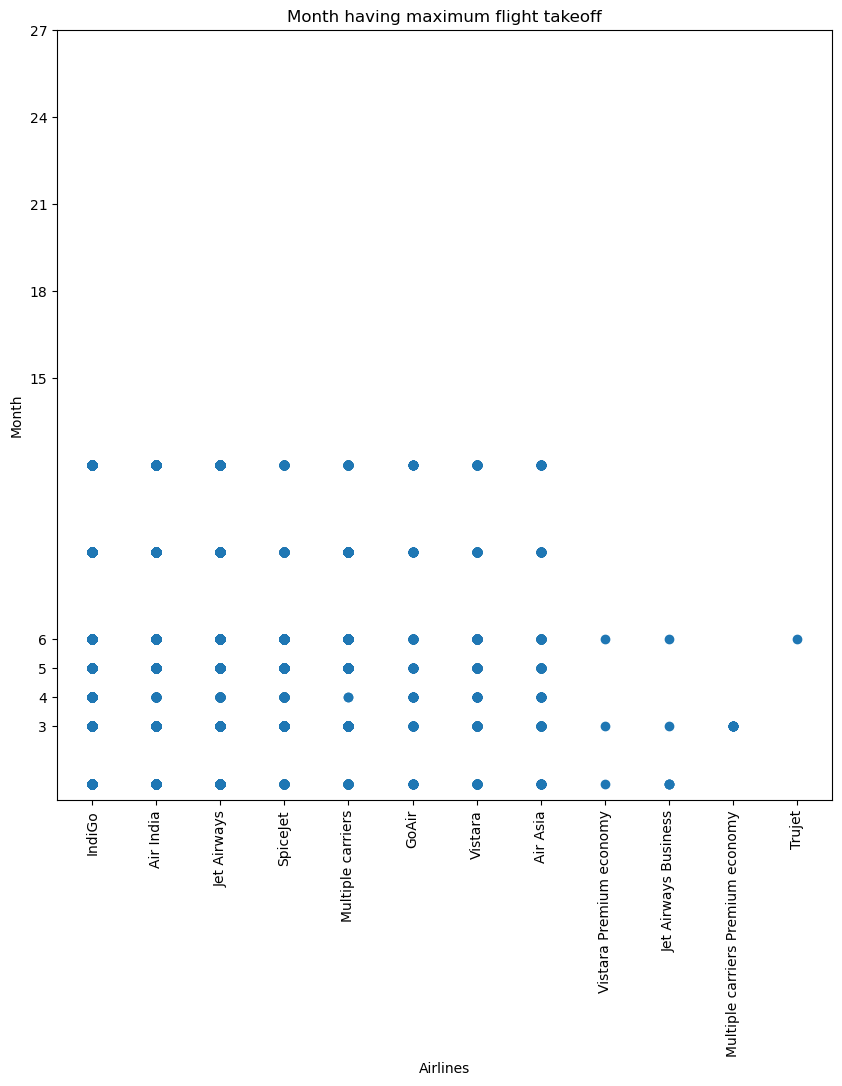

In [29]:
# Month which have maximum flight take off
plt.figure(figsize=(10,10))
month = list(df['Month_of_journey'])
airline = list(df['Airline'])
plt.scatter(airline,month)

plt.xticks(rotation=90)
plt.yticks(x)
plt.title('Month having maximum flight takeoff')
plt.xlabel('Airlines')
plt.ylabel('Month')
plt.show()

In [30]:
df.groupby('Month_of_journey')['Price'].agg(['sum'])

,sum
Month_of_journey,
1,11279591
3,18647220
4,2217885
5,19414875
6,23369151
9,13429373
12,8719011


In [31]:
y = df.groupby('Month_of_journey')['Price'].agg(['sum']).iloc[:,0]
y = list(y)
y

[11279591, 18647220, 2217885, 19414875, 23369151, 13429373, 8719011]

In [32]:
x = df.groupby('Month_of_journey')['Price'].agg(['sum']).index
x = list(x)
x

[1, 3, 4, 5, 6, 9, 12]

([<matplotlib.axis.YTick at 0x294f9acc340>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

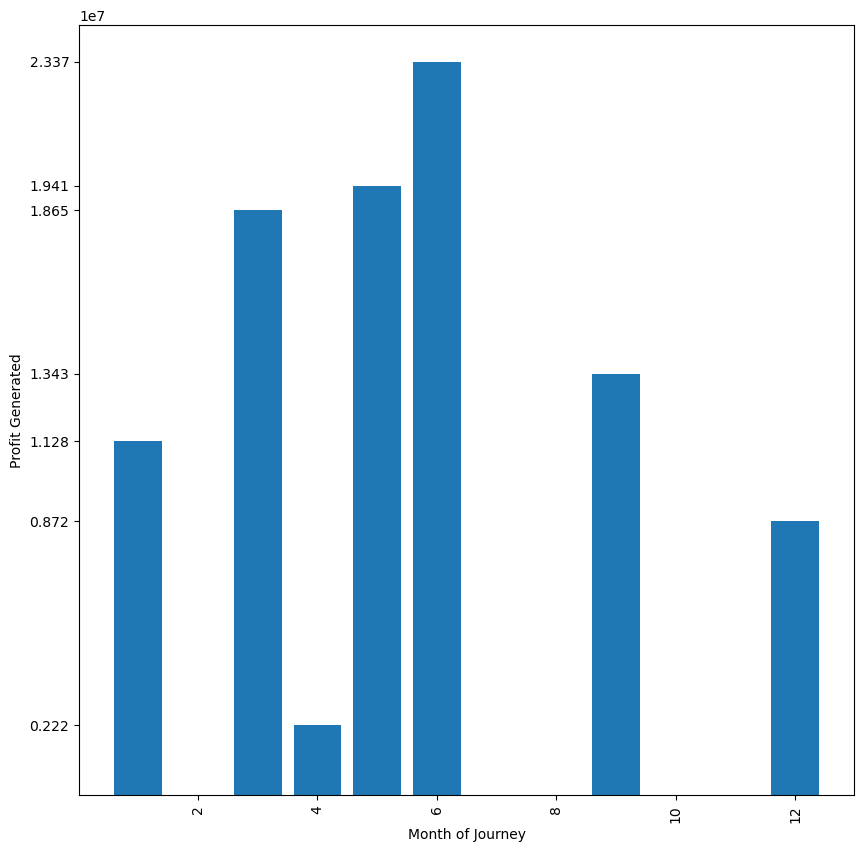

In [33]:
plt.figure(figsize=(10,10))
plt.bar(x,y)
plt.xlabel('Month of Journey')
plt.xticks(rotation=90)
plt.ylabel("Profit Generated")
plt.yticks(y)



In [34]:
# Checking the availability of flight according to the Sourcea and Destination 

pd.set_option('display.max_rows',None)


In [35]:
df1=df.groupby(['Month_of_journey','Source'])['Destination'].value_counts()

In [36]:
df1

Month_of_journey  Source    Destination
1                 Banglore  Delhi           281
                  Chennai   Kolkata          38
                  Delhi     Cochin          292
                  Kolkata   Banglore        392
                  Mumbai    Hyderabad        72
3                 Banglore  Delhi           615
                  Chennai   Kolkata         103
                  Delhi     Cochin          971
                  Kolkata   Banglore        333
                  Mumbai    Hyderabad       189
4                 Banglore  Delhi           208
                  Delhi     Cochin          109
                  Kolkata   Banglore        107
5                 Banglore  Delhi           216
                  Chennai   Kolkata          64
                  Delhi     Cochin          948
                  Kolkata   Banglore        746
                  Mumbai    Hyderabad       100
6                 Banglore  Delhi           425
                  Chennai   Kolkata         107
